# DNN - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')
    df_train = shuffle(df_train)
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    X_train.reset_index(inplace=True, drop=True)
    Y_train.reset_index(inplace=True, drop=True)
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [5]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    df_test = shuffle(df_test)
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    X_test.reset_index(inplace=True, drop=True)
    Y_test.reset_index(inplace=True, drop=True)
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [6]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    min_delta = 0.0001,
    restore_best_weights=True)

In [8]:
def neural_network():
    #Neural Network Model
    model = Sequential()
    model.add(Dense(256, input_dim=65, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = METRICS)
    
    return model


In [9]:
model = neural_network()

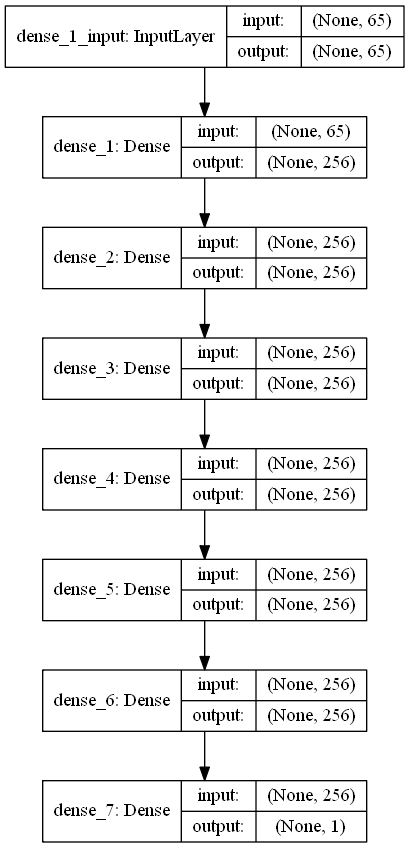

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
estimator = KerasClassifier(build_fn=neural_network)
estimator.fit(X_train,Y_train,verbose=1,callbacks=[early_stopping], epochs=200,validation_split=0.1,batch_size=64)

Train on 90941 samples, validate on 10105 samples
Epoch 1/200
90941/90941 [==============================] - 19s 206us/step - loss: 0.4089 - accuracy: 0.7485 - precision: 0.8100 - recall: 0.6239 - auc: 0.8379 - val_loss: 0.2048 - val_accuracy: 0.8433 - val_precision: 0.8343 - val_recall: 0.8457 - val_auc: 0.91630.4107 - accuracy: 0.7477 - precision: 0.8098 - recall: 0.6221 - auc: 0.8
Epoch 2/200
90941/90941 [==============================] - 18s 196us/step - loss: 0.2024 - accuracy: 0.8622 - precision: 0.8440 - recall: 0.8795 - auc: 0.9337 - val_loss: 0.2118 - val_accuracy: 0.8731 - val_precision: 0.8505 - val_recall: 0.8967 - val_auc: 0.9440
Epoch 3/200
90941/90941 [==============================] - 18s 193us/step - loss: 0.1933 - accuracy: 0.8792 - precision: 0.8551 - recall: 0.9051 - auc: 0.9496 - val_loss: 0.1975 - val_accuracy: 0.8840 - val_precision: 0.8577 - val_recall: 0.9129 - val_auc: 0.9539545 - recall: 0.903 - ETA: 3s - loss: 0.1929 - accuracy:
Epoch 4/200
90941/90941 [====

Epoch 62/200
90941/90941 [==============================] - 15s 165us/step - loss: 0.1498 - accuracy: 0.9172 - precision: 0.8960 - recall: 0.9388 - auc: 0.9794 - val_loss: 0.1830 - val_accuracy: 0.9173 - val_precision: 0.8961 - val_recall: 0.9387 - val_auc: 0.9795
Epoch 63/200
90941/90941 [==============================] - 13s 146us/step - loss: 0.1496 - accuracy: 0.9173 - precision: 0.8963 - recall: 0.9388 - auc: 0.9795 - val_loss: 0.1882 - val_accuracy: 0.9174 - val_precision: 0.8964 - val_recall: 0.9388 - val_auc: 0.9796
Epoch 64/200
90941/90941 [==============================] - 14s 154us/step - loss: 0.1489 - accuracy: 0.9175 - precision: 0.8965 - recall: 0.9388 - auc: 0.9796 - val_loss: 0.1818 - val_accuracy: 0.9176 - val_precision: 0.8966 - val_recall: 0.9388 - val_auc: 0.9796
Epoch 65/200
90941/90941 [==============================] - 13s 143us/step - loss: 0.1486 - accuracy: 0.9176 - precision: 0.8967 - recall: 0.9389 - auc: 0.9797 - val_loss: 0.1776 - val_accuracy: 0.9177 - v

Epoch 93/200
90941/90941 [==============================] - 15s 164us/step - loss: 0.1355 - accuracy: 0.9213 - precision: 0.9025 - recall: 0.9398 - auc: 0.9815 - val_loss: 0.1848 - val_accuracy: 0.9214 - val_precision: 0.9026 - val_recall: 0.9398 - val_auc: 0.9815
Epoch 94/200
90941/90941 [==============================] - 13s 145us/step - loss: 0.1347 - accuracy: 0.9214 - precision: 0.9027 - recall: 0.9398 - auc: 0.9816 - val_loss: 0.2045 - val_accuracy: 0.9215 - val_precision: 0.9028 - val_recall: 0.9398 - val_auc: 0.9816
Epoch 95/200
90941/90941 [==============================] - 15s 166us/step - loss: 0.1349 - accuracy: 0.9216 - precision: 0.9029 - recall: 0.9398 - auc: 0.9816 - val_loss: 0.1975 - val_accuracy: 0.9216 - val_precision: 0.9030 - val_recall: 0.9399 - val_auc: 0.9817
Epoch 96/200
90941/90941 [==============================] - 14s 151us/step - loss: 0.1343 - accuracy: 0.9217 - precision: 0.9031 - recall: 0.9399 - auc: 0.9817 - val_loss: 0.1937 - val_accuracy: 0.9218 - v

Epoch 124/200
90941/90941 [==============================] - 13s 146us/step - loss: 0.1201 - accuracy: 0.9252 - precision: 0.9081 - recall: 0.9414 - auc: 0.9832 - val_loss: 0.2176 - val_accuracy: 0.9252 - val_precision: 0.9082 - val_recall: 0.9414 - val_auc: 0.9833
Epoch 125/200
90941/90941 [==============================] - 13s 141us/step - loss: 0.1186 - accuracy: 0.9253 - precision: 0.9083 - recall: 0.9415 - auc: 0.9833 - val_loss: 0.2054 - val_accuracy: 0.9254 - val_precision: 0.9084 - val_recall: 0.9415 - val_auc: 0.9833
Epoch 126/200
90941/90941 [==============================] - 13s 140us/step - loss: 0.1190 - accuracy: 0.9254 - precision: 0.9085 - recall: 0.9415 - auc: 0.9834 - val_loss: 0.2151 - val_accuracy: 0.9255 - val_precision: 0.9086 - val_recall: 0.9415 - val_auc: 0.9834
Epoch 127/200
90941/90941 [==============================] - 14s 155us/step - loss: 0.1176 - accuracy: 0.9256 - precision: 0.9087 - recall: 0.9415 - auc: 0.9834 - val_loss: 0.2237 - val_accuracy: 0.9256

Epoch 155/200
90941/90941 [==============================] - 13s 141us/step - loss: 0.1024 - accuracy: 0.9291 - precision: 0.9134 - recall: 0.9437 - auc: 0.9848 - val_loss: 0.2493 - val_accuracy: 0.9291 - val_precision: 0.9135 - val_recall: 0.9437 - val_auc: 0.9848
Epoch 156/200
90941/90941 [==============================] - 15s 161us/step - loss: 0.1017 - accuracy: 0.9292 - precision: 0.9135 - recall: 0.9438 - auc: 0.9848 - val_loss: 0.2383 - val_accuracy: 0.9293 - val_precision: 0.9136 - val_recall: 0.9438 - val_auc: 0.9849
Epoch 157/200
90941/90941 [==============================] - 13s 148us/step - loss: 0.1014 - accuracy: 0.9293 - precision: 0.9137 - recall: 0.9438 - auc: 0.9849 - val_loss: 0.2337 - val_accuracy: 0.9294 - val_precision: 0.9138 - val_recall: 0.9439 - val_auc: 0.9849
Epoch 158/200
90941/90941 [==============================] - 14s 158us/step - loss: 0.1008 - accuracy: 0.9294 - precision: 0.9139 - recall: 0.9439 - auc: 0.9849 - val_loss: 0.2399 - val_accuracy: 0.9295

Epoch 186/200
90941/90941 [==============================] - 14s 157us/step - loss: 0.0844 - accuracy: 0.9330 - precision: 0.9185 - recall: 0.9462 - auc: 0.9862 - val_loss: 0.2880 - val_accuracy: 0.9330 - val_precision: 0.9186 - val_recall: 0.9462 - val_auc: 0.9862
Epoch 187/200
90941/90941 [==============================] - 13s 142us/step - loss: 0.0836 - accuracy: 0.9331 - precision: 0.9187 - recall: 0.9462 - auc: 0.9863 - val_loss: 0.2929 - val_accuracy: 0.9332 - val_precision: 0.9188 - val_recall: 0.9463 - val_auc: 0.9863
Epoch 188/200
90941/90941 [==============================] - 13s 138us/step - loss: 0.0826 - accuracy: 0.9332 - precision: 0.9188 - recall: 0.9463 - auc: 0.9863 - val_loss: 0.2944 - val_accuracy: 0.9333 - val_precision: 0.9189 - val_recall: 0.9464 - val_auc: 0.9863
Epoch 189/200
90941/90941 [==============================] - 13s 140us/step - loss: 0.0825 - accuracy: 0.9334 - precision: 0.9190 - recall: 0.9464 - auc: 0.9863 - val_loss: 0.3056 - val_accuracy: 0.9334

In [10]:
test_predictions = estimator.predict(X_test)
test_predictions

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [11]:
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(estimator, X_train, Y_train, cv=3).mean())*100))

Epoch 1/1
33682/33682 [==============================] - 2s 65us/step
Epoch 1/1
33682/33682 [==============================] - 2s 59us/step
Epoch 1/1
33682/33682 [==============================] - 2s 65us/step
Cross-Validation set accuracy: 93.415475 %


In [12]:
print("Train set accuracy : {:.4f}".format(estimator.score(X_train,Y_train)))
print("Test set accuracy  : {:.4f}".format(accuracy_score(Y_test, test_predictions)))
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

101046/101046 [==============================] - 7s 71us/step
Train set accuracy : 0.9338
Test set accuracy  : 0.8026
Test set precision : 0.6635
Test set recall    : 0.9330
Test set F1-score  : 0.7755


True Negatives  : 0.73
False Positives : 0.27
False Negatives : 0.07
True Positives  : 0.93


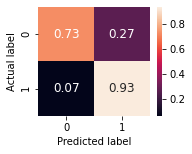

In [17]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions, normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions)

In [14]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     34204
           1       0.66      0.93      0.78     19695

    accuracy                           0.80     53899
   macro avg       0.81      0.83      0.80     53899
weighted avg       0.85      0.80      0.81     53899



In [15]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


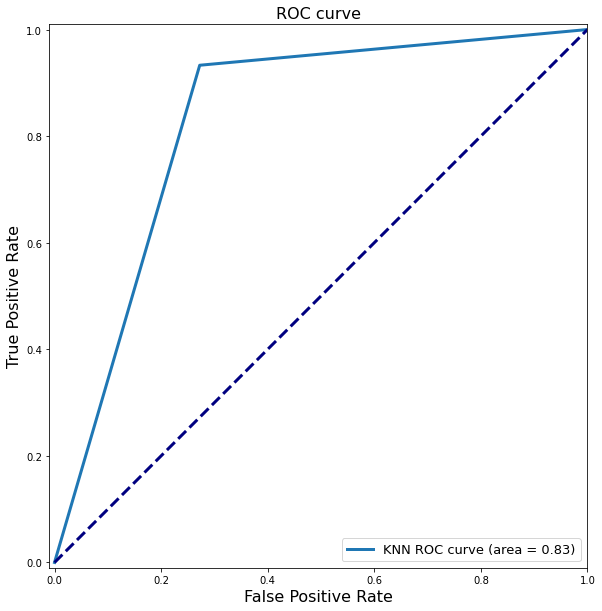

In [16]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()